# Damaris Campos- Project 1

**Problems should range from medium (13) to complex (7)**   

- All queries must use the ANSI 92 standard for queries with the type safe “on” and will have relational output
    
- Output should be in a JSON component.

## **<mark style=background-color:#82D5E2>Top 3 Problems</mark>**

Prioritize their top 3 problems (medium, complex); explain why they chose these problems for their top rating 

### **Top 1 (Medium - Northwinds2022TSQLV7)**

<u>Proposition:</u>

- Return a query where ..
- Tables involved:

<u>Standard View:</u>

- pic

<u>Key View:</u>

- pic

<u>Columns:</u>

- columns

### **Top 2 (Medium - Northwinds2022TSQLV7)**

<u>Proposition:</u>

- Return a query where ..
- Tables involved:

<u>Standard View:</u>

- pic

<u>Key View:</u>

- pic

<u>Columns:</u>

- columns

### **Top 3 (Medium - Northwinds2022TSQLV7)**

<u>Proposition:</u>

- Return a query where ..
- Tables involved:

<u>Standard View:</u>

- pic

<u>Key View:</u>

- pic

<u>Columns:</u>

- columns

## **<mark style=background-color:#BFBBE4>Worst 3 Problems</mark>**

Prioritize their 3 worst problems (medium, and complex); explain why they chose these problems for their lowest rating. How can the problems be fixed to make them better?

### **Worst 1 (Medium - Northwinds2022TSQLV7)**

<u>Proposition:</u>

- Retrieve a query that calculates the yearly count of distinct customers, comparing the current year's number of customers with the previous year to determine if there was growth.
- Tables involved: Sales.[Orders], Sales.Customers

<u>Standard View:</u>

 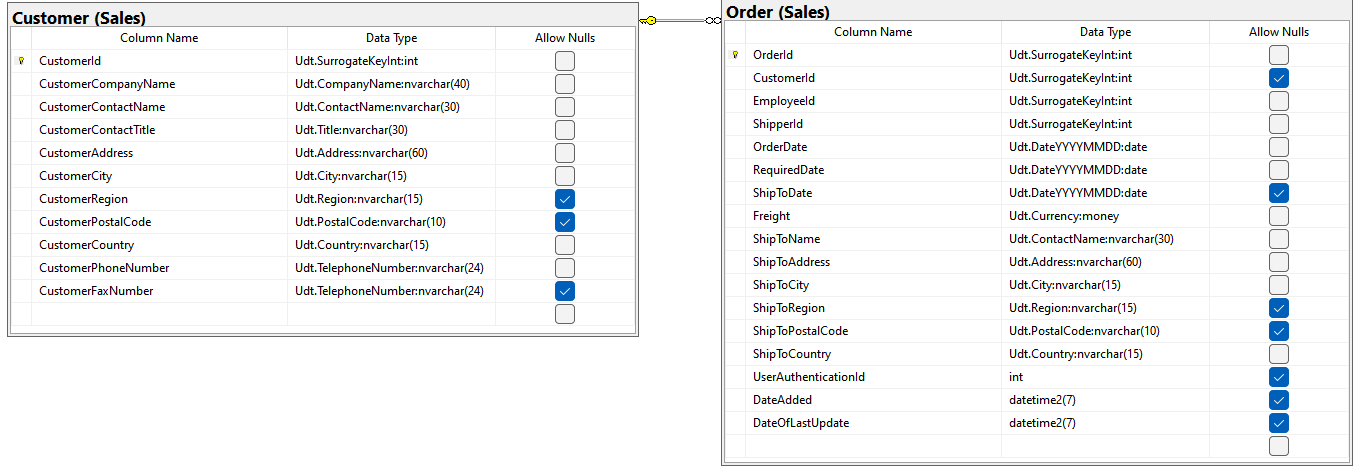

<u>Key View:</u>

 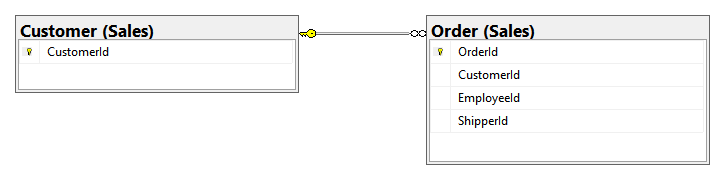

<u>Columns:</u>

| Table Name| Column Name|
| --- | --- |
| Sales.[Order] | OrderDate, CustomerId | 
| Sales.Customer | CustomerId, CustomerCity |


In [9]:
USE Northwinds2022TSQLV7;
WITH
    YearlyCount
    AS
    (
        SELECT YEAR(OrderDate) AS YearOrder,
            COUNT(DISTINCT CustomerId) AS NumberCustomers
        FROM Sales.[Order]
        GROUP BY YEAR(orderdate)
    )
SELECT Cur.YearOrder,
    Cur.NumberCustomers AS CurrentNumCustomers,
    Prv.NumberCustomers AS PreviousNumCustomers,
    Cur.NumberCustomers - Prv.NumberCustomers AS Growth,
    CustomerCity
FROM YearlyCount AS Cur
    LEFT OUTER JOIN YearlyCount AS Prv
    ON Cur.YearOrder = Prv.YearOrder + 1
    LEFT JOIN Sales.Customer AS C
    ON Cur.NumberCustomers = C.CustomerId;

--------------------------------------------------------------
-- Fixed 
--------------------------------------------------------------
USE Northwinds2022TSQLV7;
WITH
    YearlyCount
    AS
    (
        SELECT YEAR(OrderDate) AS YearOrder,
            COUNT(DISTINCT CustomerId) AS NumberCustomers
        FROM Sales.[Order]
        GROUP BY YEAR(orderdate)
    )
SELECT Cur.YearOrder,
    Cur.NumberCustomers AS CurrentNumCustomers,
    Prv.NumberCustomers AS PreviousNumCustomers,
    Cur.NumberCustomers - Prv.NumberCustomers AS Growth,
    CASE 
     WHEN Prv.NumberCustomers IS NULL THEN 'No Previous Data'
     WHEN Cur.NumberCustomers > Prv.NumberCustomers THEN 'Growth'
     WHEN Cur.NumberCustomers < Prv.NumberCustomers THEN 'Decline'
    ELSE 'Unknown'
    END AS GrowthStatus,
    CustomerCity
FROM YearlyCount AS Cur
    LEFT OUTER JOIN YearlyCount AS Prv
    ON Cur.YearOrder = Prv.YearOrder + 1
    LEFT JOIN Sales.Customer AS C
    ON Cur.NumberCustomers = C.CustomerId;


(3 rows affected)

(3 rows affected)

Total execution time: 00:00:00.025

YearOrder,CurrentNumCustomers,PreviousNumCustomers,Growth,CustomerCity
2014,67,NULL,NULL,Rio de Janeiro
2015,86,67,19,Stuttgart
2016,81,86,-5,Sao Paulo


YearOrder,CurrentNumCustomers,PreviousNumCustomers,Growth,GrowthStatus,CustomerCity
2014,67,NULL,NULL,No Previous Data,Rio de Janeiro
2015,86,67,19,Growth,Stuttgart
2016,81,86,-5,Decline,Sao Paulo


### **Worst 2 (Medium - Northwinds2022TSQLV7)**

<u>Proposition:</u>

- Return a query where ..
- Tables involved:

<u>Standard View:</u>

- pic

<u>Key View:</u>

- pic

<u>Columns:</u>

- columns

In [ ]:



---------------------------------------------------------------
-- Fixed
---------------------------------------------------------------



### **Worst 3 (Medium - Northwinds2022TSQLV7)**

<u>Proposition:</u>

- Return a query where ..
- Tables involved:

<u>Standard View:</u>

- pic

<u>Key View:</u>

- pic

<u>Columns:</u>

- columns

In [ ]:



---------------------------------------------------------------
-- Fixed
---------------------------------------------------------------

## Q7 (Medium)

## Q8 (Medium)

## Q9 (Medium)

## Q10 (Medium)

## Q11 (Medium)

## Q12 (Medium)

## Q13 (Medium)

## Q14 (Complex)

## Q15 (Complex)

## Q16 (Complex)

## Q17 (Complex - WorldWideImpostersDW)

Key View

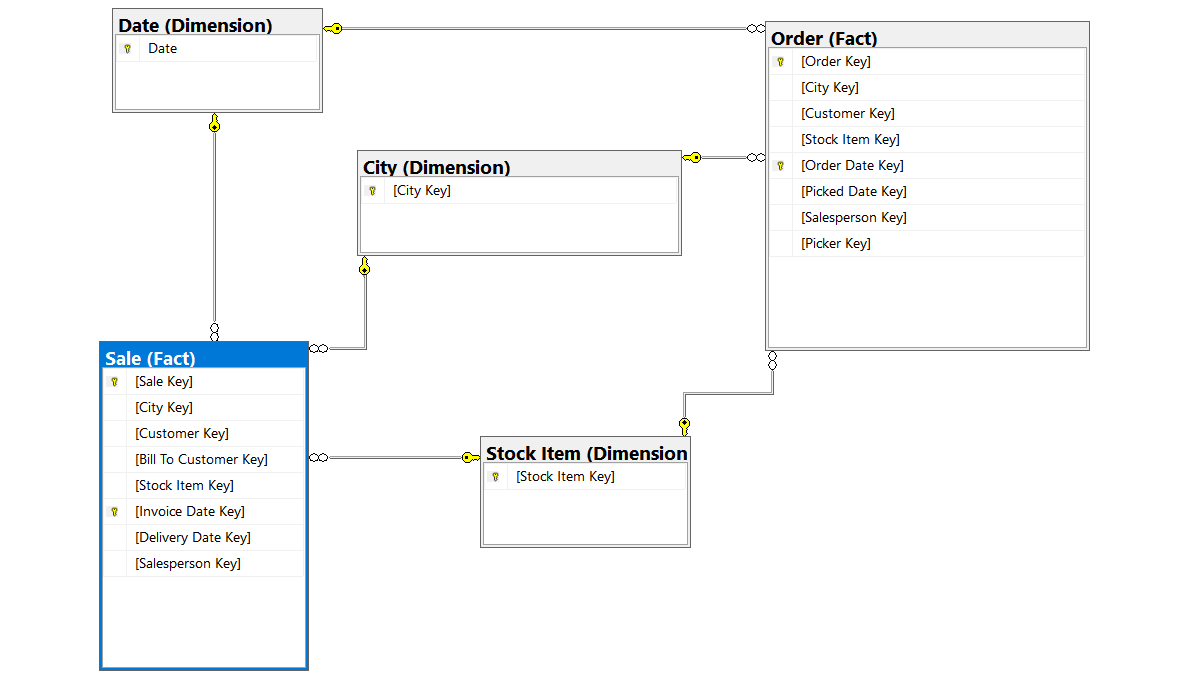

Standard View

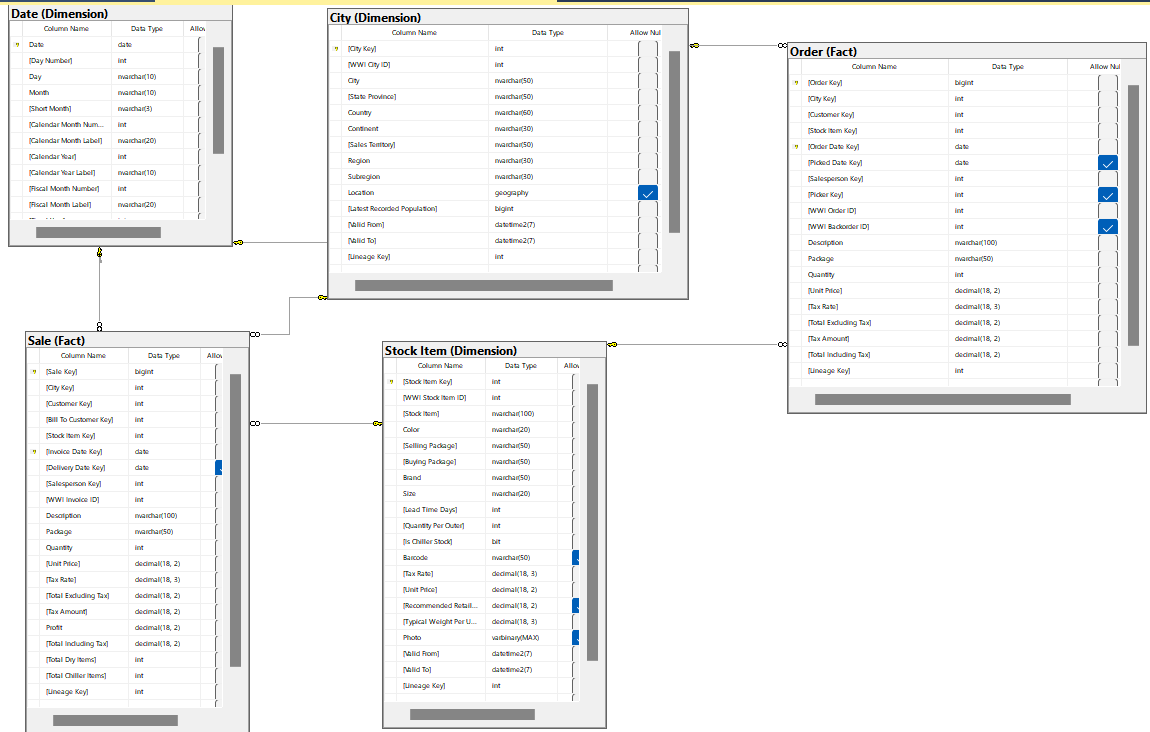

In [2]:
USE WideWorldImportersDW;
GO
-- Define a custom scalar function to categorize profit
DROP FUNCTION IF EXISTS dbo.CategorizeProfit;
GO
CREATE FUNCTION dbo.CategorizeProfit(@Profit AS DECIMAL(10,2))
RETURNS NVARCHAR(50)
AS
BEGIN
    DECLARE @Category NVARCHAR(50);
    
    SET @Category = 
        CASE
            WHEN @Profit >= 7000 THEN 'High Profit'
            WHEN @Profit >= 5000 AND @Profit < 7000 THEN 'Medium Profit'
            ELSE 'Low Profit'
        END;
    
    RETURN @Category;
END;
GO

-- Complex query joining multiple tables
WITH ItemPrices AS (
    SELECT 
        dc.City,
        dc.[State Province],
        fs.Profit,
        si.[Stock Item],
        fs.[Unit Price],
        dd.[Date]
    FROM 
        Dimension.City AS dc
    INNER JOIN 
        Fact.[Order] AS fo ON dc.[City Key] = fo.[City Key]
    INNER JOIN
        Dimension.[Stock Item] AS si ON fo.[Stock Item Key] = si.[Stock Item Key]
    INNER JOIN
        Fact.[Sale] AS fs ON si.[Stock Item Key] = fs.[Stock Item Key]
    INNER JOIN
        Dimension.[Date] AS dd ON fs.[Invoice Date Key] = dd.[Date]

)
SELECT 
    City,
    [State Province],
    [Stock Item],
    Profit,
    [Unit Price],
    [Date],
    dbo.CategorizeProfit(Profit) AS ProfitCategory
FROM 
    ItemPrices
WHERE 
    YEAR([Date]) = '2015'
    AND Month([Date]) = '07'
    AND DAY([Date]) = '22'
    AND Profit BETWEEN 2000 AND 8000
    AND [State Province] IN ('New York', 'Florida', 'Texas', 'California') -- Filter for specified states
    AND [Stock Item] = '20 mm Double sided bubble wrap 50m' -- Filter for specific item

ORDER BY
    [State Province];
-- Cleanup
DROP FUNCTION IF EXISTS dbo.CategorizeProfit;
GO


Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

(221 rows affected)

Total execution time: 00:00:00.042

City,State Province,Stock Item,Profit,Unit Price,Date,ProfitCategory
Yermo,California,20 mm Double sided bubble wrap 50m,7360.00,108.00,2015-07-22,High Profit
El Centro,California,20 mm Double sided bubble wrap 50m,7360.00,108.00,2015-07-22,High Profit
San Jacinto,California,20 mm Double sided bubble wrap 50m,7360.00,108.00,2015-07-22,High Profit
Arrowhead Highlands,California,20 mm Double sided bubble wrap 50m,7360.00,108.00,2015-07-22,High Profit
South Laguna,California,20 mm Double sided bubble wrap 50m,7360.00,108.00,2015-07-22,High Profit
Taft Heights,California,20 mm Double sided bubble wrap 50m,7360.00,108.00,2015-07-22,High Profit
Lompoc,California,20 mm Double sided bubble wrap 50m,7360.00,108.00,2015-07-22,High Profit
El Centro,California,20 mm Double sided bubble wrap 50m,7360.00,108.00,2015-07-22,High Profit
Arrowbear Lake,California,20 mm Double sided bubble wrap 50m,7360.00,108.00,2015-07-22,High Profit
Lompoc,California,20 mm Double sided bubble wrap 50m,7360.00,108.00,2015-07-22,High Profit


## Q18 (Medium - WorldWideImposters)

- Return a query that analyzes sales data from 2015, focusing on high-value transactions in February to ensure timely deliveries. 
- Tables involved include Sales.Customers, Sales.Orders, Sales.CustomerTransactions, and Sales.Invoices.

In [26]:
USE WideWorldImporters;
WITH CustomerOrderDetails AS (
    SELECT
        C.CustomerName,
        O.OrderDate,
        O.ExpectedDeliveryDate,
        CT.TransactionAmount,
		I.ConfirmedDeliveryTime
    FROM
        Sales.Customers AS C
    JOIN
        Sales.Orders AS O ON C.CustomerID = O.CustomerID
    JOIN
        Sales.CustomerTransactions AS CT ON C.CustomerID = CT.CustomerID
	JOIN 
		Sales.Invoices AS I ON C.CustomerID = I.CustomerID
)
SELECT
    CustomerName,
    OrderDate,
    ExpectedDeliveryDate,
	ConfirmedDeliveryTime,
    TransactionAmount

FROM
    CustomerOrderDetails
WHERE 
    YEAR(OrderDate) = '2015' 
	AND YEAR(ConfirmedDeliveryTime) = '2015'
    AND MONTH(OrderDate) = '02'
	AND MONTH(ConfirmedDeliveryTIme) = '02'
    AND TransactionAmount > 35000
	 AND DATEDIFF(day, OrderDate, ExpectedDeliveryDate) >= 0 
GROUP BY
    CustomerName,
    OrderDate,
    ExpectedDeliveryDate,
    TransactionAmount,
	ConfirmedDeliveryTime
ORDER BY
    TransactionAmount DESC;


(9 rows affected)

Total execution time: 00:00:00.082

CustomerName,OrderDate,ExpectedDeliveryDate,ConfirmedDeliveryTime,TransactionAmount
Cong Hoa,2015-02-10,2015-02-11,2015-02-11 11:20:00.0000000,36829.90
Cong Hoa,2015-02-10,2015-02-11,2015-02-12 08:05:00.0000000,36829.90
Cong Hoa,2015-02-10,2015-02-11,2015-02-22 09:00:00.0000000,36829.90
Cong Hoa,2015-02-11,2015-02-12,2015-02-11 11:20:00.0000000,36829.90
Cong Hoa,2015-02-11,2015-02-12,2015-02-12 08:05:00.0000000,36829.90
Cong Hoa,2015-02-11,2015-02-12,2015-02-22 09:00:00.0000000,36829.90
Cong Hoa,2015-02-21,2015-02-23,2015-02-11 11:20:00.0000000,36829.90
Cong Hoa,2015-02-21,2015-02-23,2015-02-12 08:05:00.0000000,36829.90
Cong Hoa,2015-02-21,2015-02-23,2015-02-22 09:00:00.0000000,36829.90


## Q19 (Complex - AdventureWorks2017)

- Write a query that retrieves the product name, its special discount percentage, rating, start and end dates of the discount, and its standard price for comparison. Arrange the results from greatest to lowest discount percentage. 
- Tables involved: Production.ProductReview, Production.Product, Sales.SpecialOfferProduct, Sales.SpecialOffer, and Purchasing.ProductVendor

Key View

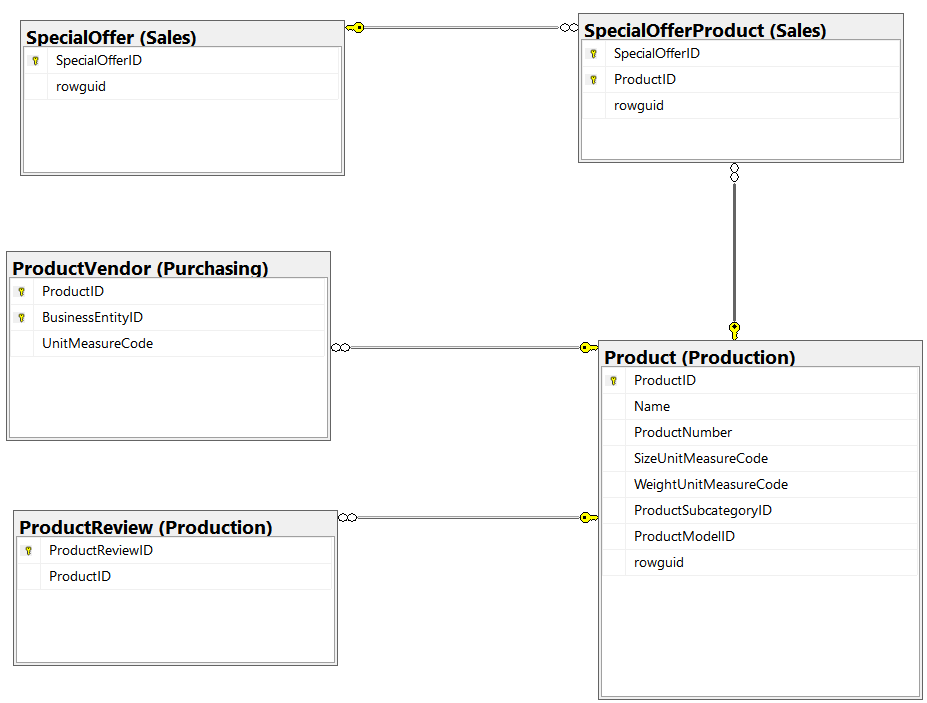

Standard View

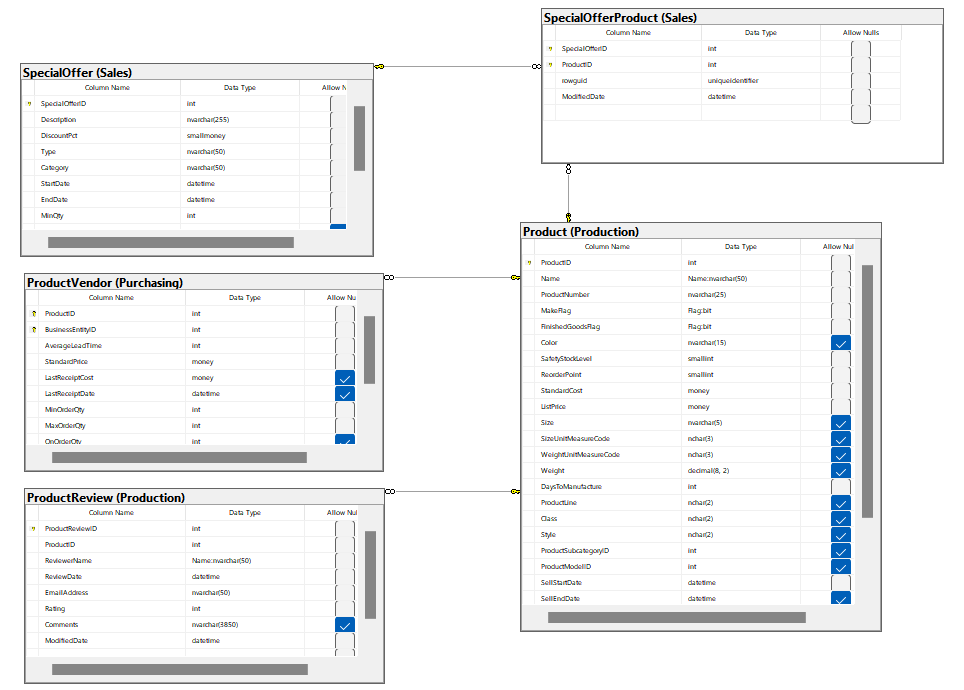

Columns

| Table Name | Column Name |
| --- | --- |
| Production.ProductReview | Rating<br><br> |
| Production.Product | Name |
| Sales.SpecialOfferProduct | DiscountPct |
| <br> | StartDate |
| <br> | EndDate |
| Sales.SpecialOffer | <br> |
| Purchasing.ProductVendor | StandardPrice |

In [31]:
USE AdventureWorks2017;
GO

-- Define a custom scalar function to categorize discount percentage
DROP FUNCTION IF EXISTS dbo.CategorizeDiscountPercentage;
GO
CREATE FUNCTION dbo.CategorizeDiscountPercentage(@DiscountPct AS DECIMAL(10,2))
RETURNS NVARCHAR(50)
AS
BEGIN
    DECLARE @Category NVARCHAR(50);
    
    SET @Category = 
        CASE
            WHEN @DiscountPct <= .20 THEN 'Low Discount'
            WHEN @DiscountPct > .20 AND @DiscountPct <= .40 THEN 'Medium Discount'
            ELSE 'High Discount'
        END;
    
    RETURN @Category;
END;
GO

WITH StoreProductDiscounts AS (
    SELECT 
        s.Rating,
        p.Name AS ProductName,
        so.DiscountPct,
        so.StartDate,
        so.EndDate,
        st.StandardPrice,
        dbo.CategorizeDiscountPercentage(so.DiscountPct) AS DiscountCategory
    FROM 
        Production.ProductReview s
    INNER JOIN 
        Production.Product p ON s.ProductID = p.ProductID
    INNER JOIN 
        Sales.SpecialOfferProduct sop ON p.ProductID = sop.ProductID
    INNER JOIN 
        Sales.SpecialOffer so ON sop.SpecialOfferID = so.SpecialOfferID
    INNER JOIN 
        Purchasing.ProductVendor st ON s.ProductID = st.ProductID
),
MaxDiscounts AS (
    SELECT 
        Rating,
        ProductName,
        MAX(DiscountPct) AS MaxDiscount
    FROM 
        StoreProductDiscounts
    GROUP BY 
        Rating, ProductName
)
SELECT 
    spd.Rating,
    spd.ProductName,
    spd.DiscountPct,
    spd.StartDate,
    spd.EndDate,
    spd.StandardPrice,
    spd.DiscountCategory
FROM 
    StoreProductDiscounts spd
INNER JOIN 
    MaxDiscounts  AS md ON spd.Rating = md.Rating
                    AND spd.ProductName = md.ProductName 
                    AND spd.DiscountPct = md.MaxDiscount
WHERE 
    spd.DiscountPct = md.MaxDiscount
ORDER BY 
    spd.DiscountPct DESC
FOR JSON PATH, ROOT('ComplexOutput'), INCLUDE_NULL_VALUES;

-- Cleanup
DROP FUNCTION IF EXISTS dbo.CategorizeDiscountPercentage;
GO


Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

(3 rows affected)

Total execution time: 00:00:00.110

JSON_F52E2B61-18A1-11d1-B105-00805F49916B
"{""ComplexOutput"":[{""Rating"":2,""ProductName"":""HL Mountain Pedal"",""DiscountPct"":0.5000,""StartDate"":""2013-07-14T00:00:00"",""EndDate"":""2013-08-14T00:00:00"",""StandardPrice"":59.9900,""DiscountCategory"":""High Discount""},{""Rating"":4,""ProductName"":""HL Mountain Pedal"",""DiscountPct"":0.5000,""StartDate"":""2013-07-14T00:00:00"",""EndDate"":""2013-08-14T00:00:00"",""StandardPrice"":59.9900,""DiscountCategory"":""High Discount""},{""Rating"":5,""ProductName"":""Mountain Bike Socks, M"",""DiscountPct"":0.1000,""StartDate"":""2011-05-31T00:00:00"",""EndDate"":""2014-05-30T00:00:00"",""StandardPrice"":3.1000,""DiscountCategory"":""Low Discount""}]}"


## Q20 (Complex - Northwinds2022TSQLV7)

- Write a query to retrieve the name of the most bought product, along with its supplier's country and the total quantity purchased for each of the products in 2016, including their order dates. 
- Tables involved: Production.Product, Production.Supplier,Sales.OrderDetail, Sales.\[Order\]

Key View

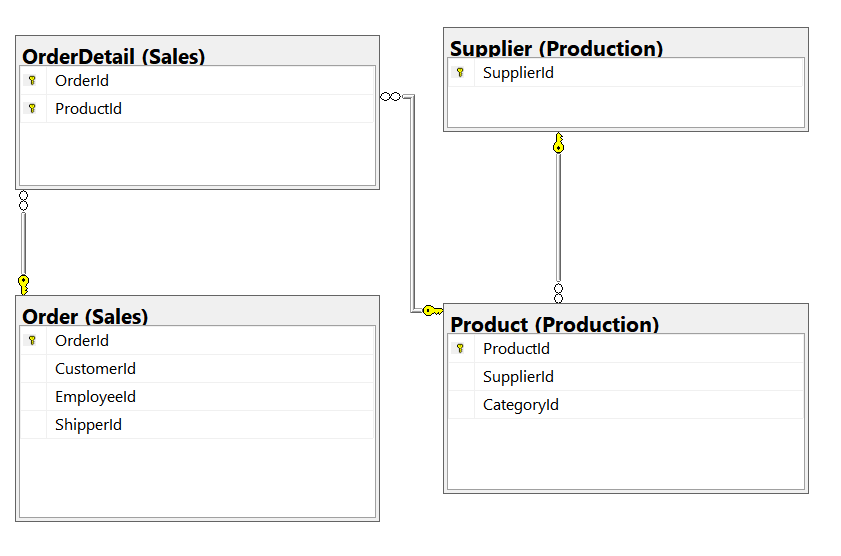

Standard View

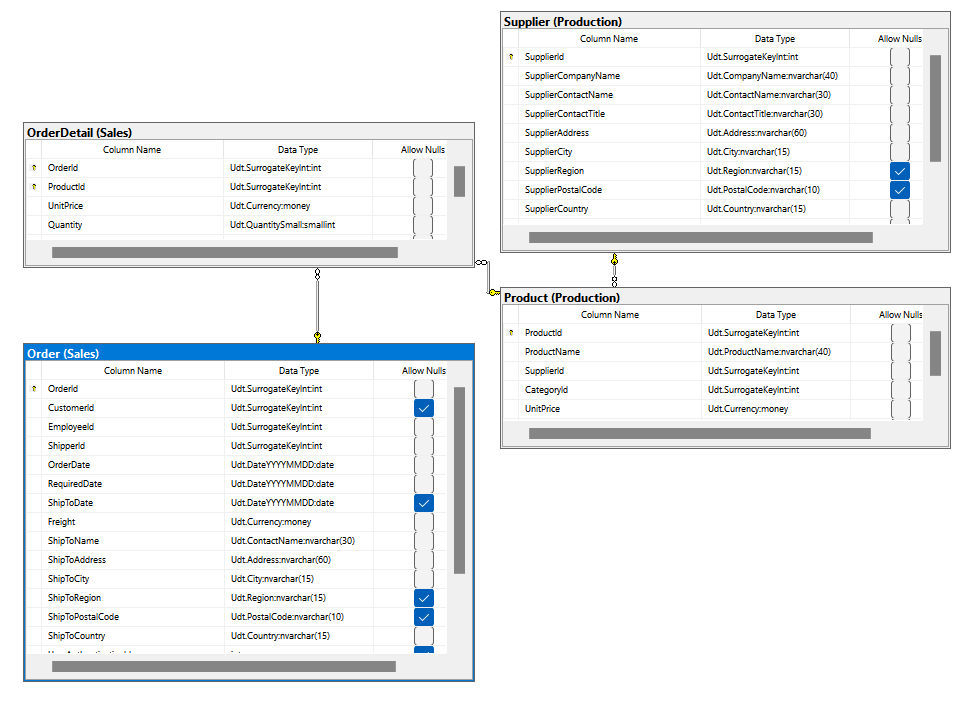

Columns:

| Table Name | Column Name |
| --- | --- |
| Production.Product | ProductId<br><br> |
|  | ProductName |
| Production.Supplier | SupplierCountry |
| Sales.OrderDetail | Quantity |
|  | OrderId |
| Sales.\[Order\] | OrderId |
|  | OrderDate |

In [30]:
USE Northwinds2022TSQLV7;
GO

-- Define a custom scalar function to categorize total quantity
DROP FUNCTION IF EXISTS dbo.CategorizeTotalQuantity;
GO
CREATE FUNCTION dbo.CategorizeTotalQuantity(@Quantity AS INT)
RETURNS NVARCHAR(50)
AS
BEGIN
    DECLARE @Category NVARCHAR(50);
    
    SET @Category = 
        CASE
            WHEN @Quantity < 100 THEN 'Low Quantity'
            WHEN @Quantity >= 100 AND @Quantity < 500 THEN 'Medium Quantity'
            ELSE 'High Quantity'
        END;
    
    RETURN @Category;
END;
GO

WITH ProductSupplierSales AS (
    SELECT 
        p.ProductId,
        p.ProductName,
        s.SupplierCountry,
        SUM(od.Quantity) AS TotalQuantity,
        dbo.CategorizeTotalQuantity(SUM(od.Quantity)) AS QuantityCategory
    FROM 
        Production.Product p
    INNER JOIN 
        Production.Supplier s ON p.SupplierId = s.SupplierId
    INNER JOIN 
        Sales.OrderDetail od ON p.ProductId = od.ProductId
    INNER JOIN 
        Sales.[Order] o ON od.OrderId = o.OrderId
    WHERE 
        YEAR(o.OrderDate) = 2016
    GROUP BY 
        p.ProductId, p.ProductName, s.SupplierCountry
)
SELECT 
    ProductName,
    SupplierCountry,
    TotalQuantity,
    QuantityCategory
FROM 
    ProductSupplierSales
ORDER BY 
    TotalQuantity DESC
FOR JSON PATH, ROOT('ComplexOutput'), INCLUDE_NULL_VALUES;

-- Cleanup
DROP FUNCTION IF EXISTS dbo.CategorizeTotalQuantity;
GO


Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

(76 rows affected)

Total execution time: 00:00:00.048

ProductName,SupplierCountry,TotalQuantity,QuantityCategory
Product POXFU,Japan,659,High Quantity
Product QOGNU,Brazil,546,High Quantity
Product WHBYK,France,542,High Quantity
Product UKXRI,France,513,High Quantity
Product HMLNI,USA,414,Medium Quantity
Product BWRLG,Germany,405,Medium Quantity
Product HHYDP,UK,399,Medium Quantity
Product RECZE,UK,396,Medium Quantity
Product JYGFE,Finland,388,Medium Quantity
Product WUXYK,Canada,351,Medium Quantity
